In [1]:
from diffusers import DiffusionPipeline
import torch

In [10]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
prompts=[
    "Naruto Uzumaki eating ramen",
    "Bill Gates in Naruto style",
    "A boy with blue eyes in Naruto style",
]
negative_prompt = "low quality, blurry, distorted"


In [12]:
image_normal1 = pipe(
    prompt=prompts[0],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(32)
).images[0]
image_normal2 = pipe(
    prompt=prompts[1],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(42)
).images[0]
image_normal3 = pipe(
    prompt=prompts[2],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(52)
).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [13]:
image_normal1.save("/content/image_normal1.png")
image_normal2.save("/content/image_normal2.png")
image_normal3.save("/content/image_normal3.png")

In [14]:
lora_path = "/content/model/pytorch_lora_weights_450.safetensors"   # Path containing the LoRA .safetensors file
pipe.load_lora_weights(lora_path, adapter_name="my-lora_500_epoch")
pipe.set_adapters("my-lora_500_epoch")

# merges the LoRA weights directly into the base model weights. Faster inference and low VRAM usage.
pipe.fuse_lora(lora_scale=1.0)


In [15]:
image_train1 = pipe(
    prompt=prompts[0],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(32)
).images[0]
image_train2 = pipe(
    prompt=prompts[1],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(42)
).images[0]
image_train3 = pipe(
    prompt=prompts[2],
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.0,
    width=1024,
    height=1024,
    generator=torch.manual_seed(52)
).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [16]:
image_train1.save("/content/image_train1.png")
image_train2.save("/content/image_train2.png")
image_train3.save("/content/image_train3.png")

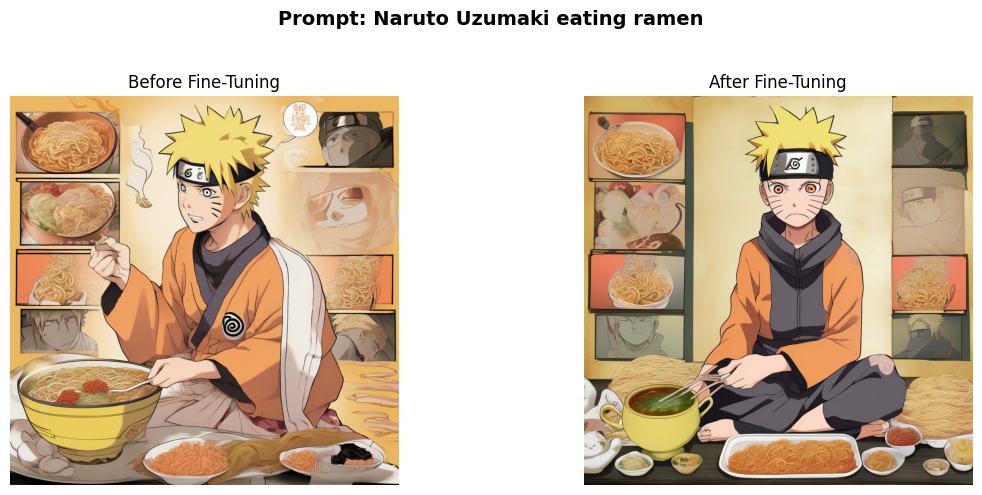

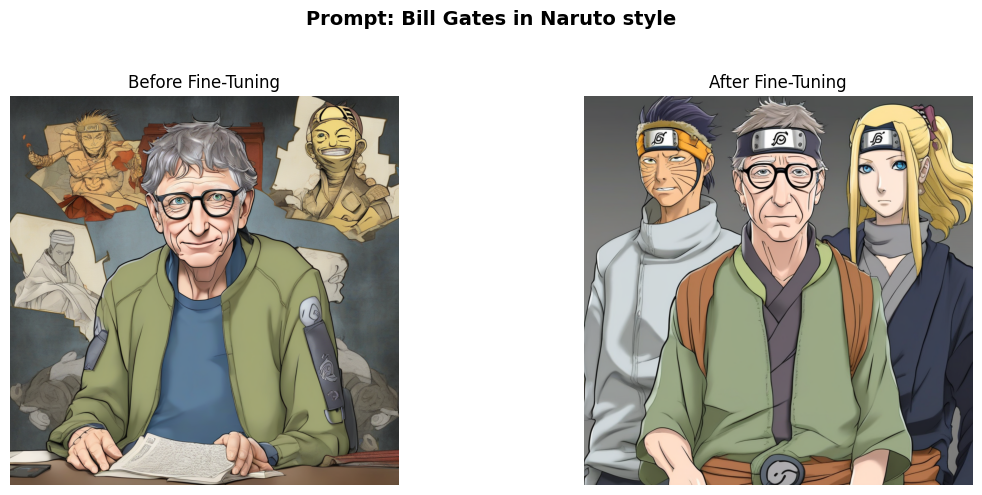

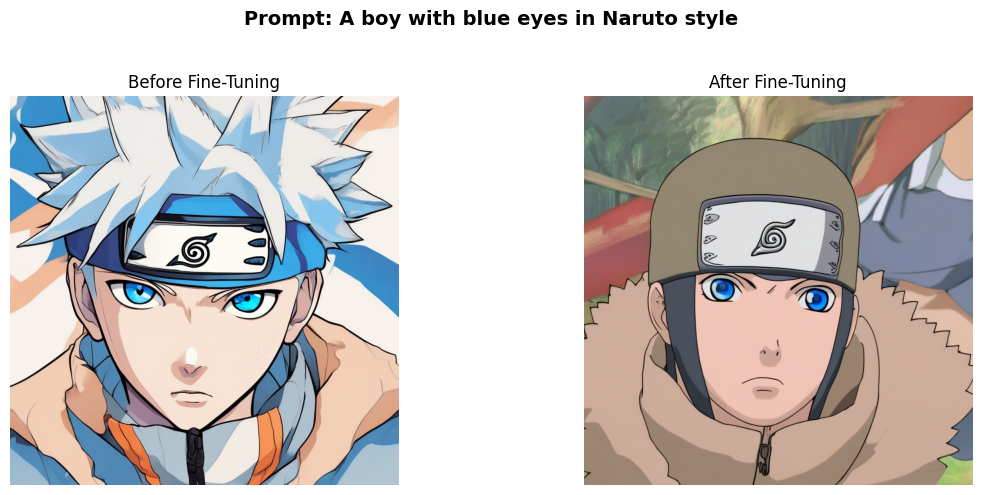

In [17]:
import matplotlib.pyplot as plt

# Data structure for clean handling
results = [
    (prompts[0], image_normal1, image_train1),
    (prompts[1], image_normal2, image_train2),
    (prompts[2], image_normal3, image_train3),
]

# Loop through each prompt result
for prompt, before_img, after_img in results:
    plt.figure(figsize=(12, 5))

    plt.suptitle(f"Prompt: {prompt}", fontsize=14, fontweight="bold")

    # Before Fine-Tuning
    plt.subplot(1, 2, 1)
    plt.imshow(before_img)
    plt.title("Before Fine-Tuning")
    plt.axis("off")

    # After Fine-Tuning
    plt.subplot(1, 2, 2)
    plt.imshow(after_img)
    plt.title("After Fine-Tuning")
    plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
